In [1]:
import ugradio
import numpy as np

import ugradio.pico as pico
import ugradio.dft as dft
import ugradio.doppler as doppler
import ugradio.nch as nch
import ugradio.timing as timing

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

import astropy
import unittest

In [2]:
correct_data = np.load('../Data/Horn Data 50mV Range.npz')

In [3]:
correct_water_data = np.load('../Data/Horn Data W Water 50mV Range.npz')

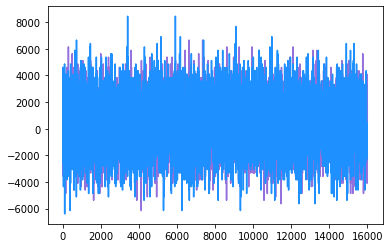

In [4]:
plt.plot(correct_data["arr_0"][0][0], "mediumpurple")
plt.plot(correct_water_data["arr_0"][0][0], "dodgerblue")

In [7]:
# capture 10,000 blocks of data
#for i in range(1, 11):
#    horn_data = ugradio.pico.capture_data('50mV', divisor=1, dual_mode=True, nblocks=1000)
 #   np.savez("../Data/10000_blocks/NEW_Horn_Data_10000blocks_" + str(i) + ".npz", horn_data)
 #   print("NEW_Horn_Data_10000blocks_" + str(i) + ".npz has been saved")

In [8]:
# load in 10,000 blocks of data
#large_data = list(np.load('../Data/10000_blocks/Horn_Data_10000blocks_1.npz')["arr_0"][0])
#for i in range(2, 101):
    #new_data_set = np.load("../Data/10000_blocks/Horn_Data_10000blocks_" + str(i) + ".npz")
    #new_data_set = new_data_set["arr_0"][0] - (new_data_set["arr_0"][1]*5/4*1j)
    #array_tuple = (large_data, new_data_set)
    #large_data = np.vstack(array_tuple)

In [9]:
#np.savez('../Data/Horn_Data_10000blocks.npz', large_data)

In [5]:
large_data = np.load('../Data/Horn_Data_10000blocks.npz')["arr_0"]

In [6]:
data = large_data #correct_data["arr_0"][0] - (correct_data["arr_0"][1]*5/4*1j)
water_data = correct_water_data["arr_0"][0] - (correct_water_data["arr_0"][1]*5/4*1j)
data.shape

(10000, 16000)

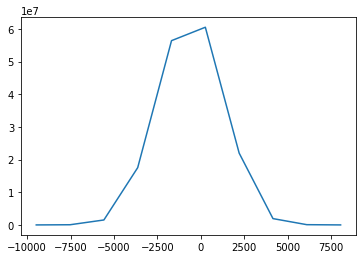

In [153]:
hist = np.histogram(data)
plt.plot(hist[1][:10], hist[0])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


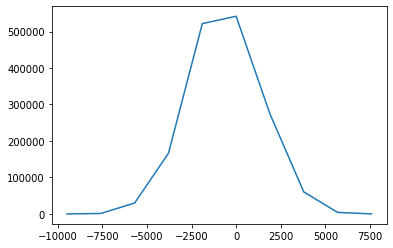

In [7]:
hist = np.histogram(water_data)
plt.plot(hist[1][:10], hist[0])

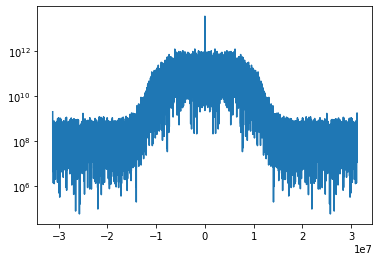

In [8]:
# COLD DATA
freq = np.fft.fftfreq(16000, 1/62.5e6)
freq = np.fft.fftshift(freq)

ft = np.fft.fft(data[0])
ft = np.fft.fftshift(ft)

power = abs(ft)**2
s_cold = power

plt.semilogy(freq, power)
#needs to be averaged

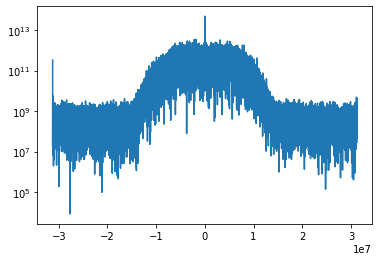

In [9]:
# CALIBRATION DATA
freq = np.fft.fftfreq(16000, 1/62.5e6)
freq = np.fft.fftshift(freq)

ft = np.fft.fft(water_data[0])
ft = np.fft.fftshift(ft)
power = abs(ft)**2
s_cal = power

plt.semilogy(freq, power)
#needs to be averaged

In [10]:
blocks = 1000
avg_power_array = []
for n in range (0, blocks):
    data_new = data[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_power_array.append(power)
    
avg_power_array = np.mean(avg_power_array, axis=0)
avg_power_array

array([2.05460371e+11, 1.99917007e+09, 1.40963921e+09, ...,
       1.10327830e+09, 1.37061094e+09, 1.94343646e+09])

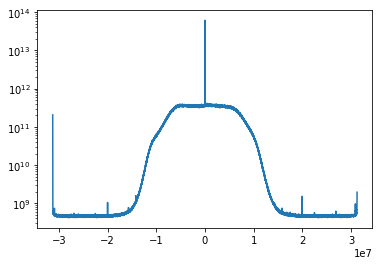

In [11]:
plt.semilogy(freq, avg_power_array)
#plt.xlim(-1e7,1e7)
#plt.vlines(1420000.4058, ymin=10e3, ymax=10e13, linewidth=.5)

In [12]:
# temperature
T_rx = 300 #kelvin
T_sky = 10 #between 10-100K
T_sys = T_rx - T_sky
T_sys

290

In [13]:
HI_Line_Frequency = 1420.4058 # this is the frequency at which you should see the spike in the power spectra. it is the frequency that corresponds to the 21cm wavelength of hydrogen. 

In [14]:
# shape
s_line = s_cold / s_cal
G = T_sys/(np.sum(s_cal-s_cold)) * np.sum(s_cold)
T_line = s_line * G

In [15]:
G

190.60948218266464

In [16]:
# calculate doppler correction
ugradio.doppler.get_projected_velocity

<function ugradio.doppler.get_projected_velocity(ra, dec, jd, obs_lat=37.873199, obs_lon=-122.257063, obs_alt=120.0, epoch=2451545.0)>